Goal: Reconstruct 2-D Gaussian sources from an incomplete Fouier space

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Gaussian sources

In [3]:
'''
    Gaussian function
'''
def gaussain_function(x_0, y_0, x, y, sigma, intensity_0):
    return intensity_0 * np.exp(-((x - x_0)**2 + (y - y_0)**2) / (2 * sigma**2))

In [4]:
'''
    Generate gaussian sources
'''
def generate_gaussian_sources(num_sources, grid_size, sigma_range, intensity_range):
    sources = []

    for _ in range(num_sources):
        # Create initial variables
        x_0 = np.random.randint(0, grid_size)
        y_0 = np.random.randint(0, grid_size)
        sigma = np.random.randint(*sigma_range) # check what * is
        intensity_0 = np.random.randint(*intensity_range) # check what * is
        # Create x and y space
        x = np.arange(0, grid_size, 1)
        y = np.arange(0, grid_size, 1)
        x, y = np.meshgrid(x, y)

        # Gaussian function
        curr_source = gaussain_function(x_0, y_0, x, y, sigma, intensity_0)
        sources.append(curr_source) # may need to change order

    return np.array(sources)


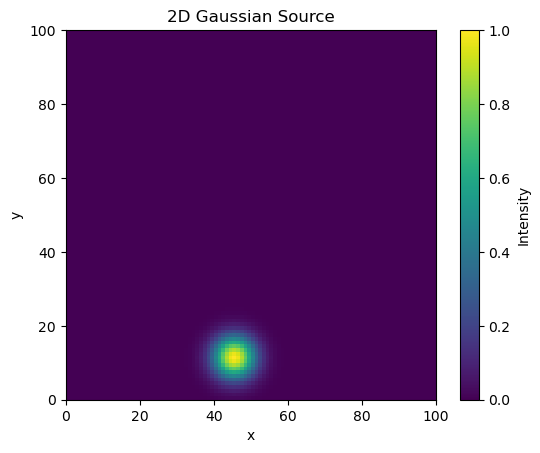

In [5]:
# Parameters
num_sources = 1000
grid_size = 100
sigma_range = (1, 10)
intensity_range = (0.5, 2) # check me!

# Generate gaussian sources
gaussian_sources = generate_gaussian_sources(num_sources, grid_size, sigma_range, intensity_range)

# Plot one of the souces
plt.imshow(gaussian_sources[0], extent=(0, grid_size, 0, grid_size))
plt.colorbar(label='Intensity')
plt.title('2D Gaussian Source')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Fourier Transformations + Incomplete Data

In [6]:
'''
    Apply Fourier transformations
'''
def apply_fourier_transform(sources):
    fourier_transformed = np.fft.fftshift(np.fft.fft2(sources), axes=(-2, -1)) 
    return fourier_transformed

In [7]:
'''
    Make data incomplete
'''
def incomplete_sampling(fourier_data, sampling_rate):
    mask = np.random.rand(*fourier_data.shape) < sampling_rate
    return fourier_data * mask, mask

TypeError: Image data of dtype complex128 cannot be converted to float

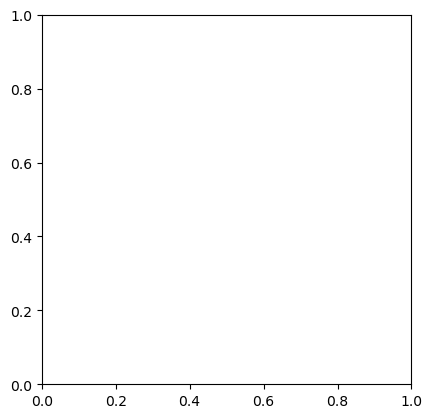

In [15]:
# Transform gaussian data and make incomplete
transformed_sources = apply_fourier_transform(gaussian_sources)

# Simulate incomplete sampling
sampling_rate = 0.5
incomplete_data, mask = incomplete_sampling(transformed_sources, sampling_rate)

# Plot incomplete data example
plt.imshow(transformed_sources[0])
plt.colorbar(label='Intensity')
plt.title('2D Gaussian Source')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
print(type(incomplete_data))

<class 'numpy.ndarray'>
